여러개의 텐서를 입력받아 여러개의 텐서를 출력하는 모델을 알아 봅시다. 그 예로서 <br>
yA = a * (xA * xB ) + b <br>
yB = c * (xA + xB ) + d <br>
의 관계를 가지는 데이터에서 a, b, c, d 를 학습으로 발견해봅시다.

In [1]:
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

a = 2; b = 1; c = 2; d = 1

x_train_A = np.random.rand(1000,1) * 2 - 1
x_train_B = np.random.rand(1000,1) * 2 - 1
y_train_A = a * (x_train_A * x_train_B) + b
y_train_B = c * (x_train_A + x_train_B) + d

xA = layers.Input((1,), name='xA')
xB = layers.Input((1,), name='xB')
hA = layers.Multiply(name='mul')([xA, xB])
hB = layers.Add(name='add')([xA, xB])
yA = layers.Dense(1, name='yA')(hA)
yB = layers.Dense(1, name='yB')(hB)

모델을 정의할때 여러개의 입력과 출력이 있으면 리스트 형식으로 넣어주면 됩니다. 

In [2]:
model = models.Model([xA, xB], [yA, yB])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xA (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
xB (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
mul (Multiply)                  (None, 1)            0           xA[0][0]                         
                                                                 xB[0][0]                         
__________________________________________________________________________________________________
add (Add)                       (None, 1)            0           xA[0][0]                     

모든 출력에 mse loss 를 적용하고 그것들을 더해 전체 loss 를 정의하려면 다음과 같이 컴파일하면 됩니다.

In [3]:
model.compile(optimizer='adam', loss='mse')

각각 출력에 특정 loss 와 가중치를 지정하여 다 더해 전체 loss 를 정의하려면 다음과 같이 컴파일하면 됩니다. 전체 loss 는 하나이므로 그것을 최적화하는 optimizer 는 하나입니다.

In [4]:
model.compile(optimizer='adam', loss={'yA': 'mse', 'yB': 'mse'}, loss_weights={'yA': 2., 'yB': 1.})

모델을 정의할 때처럼 여러 입력과 출력 데이터를 리스트 형식으로 넣고 학습을 합니다. 전체 loss 는 각각 loss 에 가중치를 곱해서 다 더한 값이라는 것을 확인할 수 있습니다.

Train on 800 samples, validate on 200 samples
Epoch 1/200
800/800 [==============================] - 0s 382us/sample - loss: 6.6176 - yA_loss: 2.1755 - yB_loss: 2.2666 - val_loss: 6.5802 - val_yA_loss: 2.1423 - val_yB_loss: 2.2956
Epoch 2/200
800/800 [==============================] - 0s 108us/sample - loss: 5.8455 - yA_loss: 1.9455 - yB_loss: 1.9546 - val_loss: 5.8298 - val_yA_loss: 1.9262 - val_yB_loss: 1.9774
Epoch 3/200
800/800 [==============================] - 0s 105us/sample - loss: 5.1569 - yA_loss: 1.7396 - yB_loss: 1.6776 - val_loss: 5.1426 - val_yA_loss: 1.7256 - val_yB_loss: 1.6915
Epoch 4/200
800/800 [==============================] - 0s 104us/sample - loss: 4.5490 - yA_loss: 1.5568 - yB_loss: 1.4355 - val_loss: 4.5546 - val_yA_loss: 1.5545 - val_yB_loss: 1.4456
Epoch 5/200
800/800 [==============================] - 0s 101us/sample - loss: 4.0143 - yA_loss: 1.3954 - yB_loss: 1.2234 - val_loss: 4.0359 - val_yA_loss: 1.4044 - val_yB_loss: 1.2270
Epoch 6/200
800/800 [========

800/800 [==============================] - 0s 102us/sample - loss: 0.0664 - yA_loss: 0.0332 - yB_loss: 1.1755e-07 - val_loss: 0.0691 - val_yA_loss: 0.0345 - val_yB_loss: 7.3436e-08
Epoch 45/200
800/800 [==============================] - 0s 99us/sample - loss: 0.0571 - yA_loss: 0.0286 - yB_loss: 4.4083e-08 - val_loss: 0.0592 - val_yA_loss: 0.0296 - val_yB_loss: 2.7141e-08
Epoch 46/200
800/800 [==============================] - 0s 101us/sample - loss: 0.0488 - yA_loss: 0.0244 - yB_loss: 1.5743e-08 - val_loss: 0.0505 - val_yA_loss: 0.0252 - val_yB_loss: 9.2315e-09
Epoch 47/200
800/800 [==============================] - 0s 99us/sample - loss: 0.0414 - yA_loss: 0.0207 - yB_loss: 5.2765e-09 - val_loss: 0.0427 - val_yA_loss: 0.0213 - val_yB_loss: 2.9577e-09
Epoch 48/200
800/800 [==============================] - 0s 99us/sample - loss: 0.0349 - yA_loss: 0.0175 - yB_loss: 1.6500e-09 - val_loss: 0.0359 - val_yA_loss: 0.0180 - val_yB_loss: 8.9424e-10
Epoch 49/200
800/800 [========================

800/800 [==============================] - 0s 105us/sample - loss: 1.3962e-09 - yA_loss: 6.9743e-10 - yB_loss: 1.3884e-12 - val_loss: 8.8139e-10 - val_yA_loss: 4.3997e-10 - val_yB_loss: 1.4362e-12
Epoch 85/200
800/800 [==============================] - 0s 101us/sample - loss: 4.8025e-10 - yA_loss: 2.3954e-10 - yB_loss: 1.1775e-12 - val_loss: 2.7994e-10 - val_yA_loss: 1.3948e-10 - val_yB_loss: 9.8954e-13
Epoch 86/200
800/800 [==============================] - 0s 101us/sample - loss: 1.5871e-10 - yA_loss: 7.8880e-11 - yB_loss: 9.5097e-13 - val_loss: 1.0666e-10 - val_yA_loss: 5.2837e-11 - val_yB_loss: 9.8954e-13
Epoch 87/200
800/800 [==============================] - 0s 104us/sample - loss: 5.4276e-11 - yA_loss: 2.6663e-11 - yB_loss: 9.5097e-13 - val_loss: 2.4590e-11 - val_yA_loss: 1.1800e-11 - val_yB_loss: 9.8954e-13
Epoch 88/200
800/800 [==============================] - 0s 104us/sample - loss: 1.7490e-11 - yA_loss: 8.2897e-12 - yB_loss: 9.1047e-13 - val_loss: 1.2522e-11 - val_yA_loss: 

Epoch 123/200
800/800 [==============================] - 0s 103us/sample - loss: 2.2583e-13 - yA_loss: 1.0950e-13 - yB_loss: 6.8314e-15 - val_loss: 2.4070e-13 - val_yA_loss: 1.1712e-13 - val_yB_loss: 6.4662e-15
Epoch 124/200
800/800 [==============================] - 0s 104us/sample - loss: 2.2583e-13 - yA_loss: 1.0950e-13 - yB_loss: 6.8314e-15 - val_loss: 2.4070e-13 - val_yA_loss: 1.1712e-13 - val_yB_loss: 6.4662e-15
Epoch 125/200
800/800 [==============================] - 0s 101us/sample - loss: 2.2583e-13 - yA_loss: 1.0950e-13 - yB_loss: 6.8314e-15 - val_loss: 2.4070e-13 - val_yA_loss: 1.1712e-13 - val_yB_loss: 6.4662e-15
Epoch 126/200
800/800 [==============================] - 0s 101us/sample - loss: 2.2583e-13 - yA_loss: 1.0950e-13 - yB_loss: 6.8314e-15 - val_loss: 2.4070e-13 - val_yA_loss: 1.1712e-13 - val_yB_loss: 6.4662e-15
Epoch 127/200
800/800 [==============================] - 0s 103us/sample - loss: 2.2583e-13 - yA_loss: 1.0950e-13 - yB_loss: 6.8314e-15 - val_loss: 2.4070e-

Epoch 162/200
800/800 [==============================] - 0s 103us/sample - loss: 1.8100e-14 - yA_loss: 5.4350e-15 - yB_loss: 7.2300e-15 - val_loss: 2.0385e-14 - val_yA_loss: 6.0696e-15 - val_yB_loss: 8.2457e-15
Epoch 163/200
800/800 [==============================] - 0s 98us/sample - loss: 1.8015e-14 - yA_loss: 5.4350e-15 - yB_loss: 7.1445e-15 - val_loss: 1.8605e-14 - val_yA_loss: 6.0696e-15 - val_yB_loss: 6.4662e-15
Epoch 164/200
800/800 [==============================] - 0s 102us/sample - loss: 1.6276e-14 - yA_loss: 2.6804e-15 - yB_loss: 1.0915e-14 - val_loss: 1.2109e-14 - val_yA_loss: 2.8216e-15 - val_yB_loss: 6.4662e-15
Epoch 165/200
800/800 [==============================] - 0s 100us/sample - loss: 1.2079e-14 - yA_loss: 2.3456e-15 - yB_loss: 7.3882e-15 - val_loss: 1.3889e-14 - val_yA_loss: 2.8216e-15 - val_yB_loss: 8.2457e-15
Epoch 166/200
800/800 [==============================] - 0s 99us/sample - loss: 1.6940e-14 - yA_loss: 2.3456e-15 - yB_loss: 1.2248e-14 - val_loss: 1.2109e-14

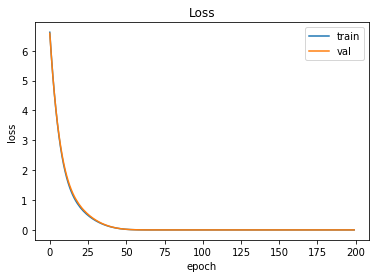

yA_weights
[array([[2.]], dtype=float32), array([1.0000001], dtype=float32)]
yB_weights
[array([[2.0003796]], dtype=float32), array([0.9998316], dtype=float32)]


In [5]:
hist = model.fit([x_train_A, x_train_B], [y_train_A, y_train_B], batch_size=8, epochs=200, validation_split=0.2)

plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

print('yA_weights'); print(model.get_layer('yA').get_weights())
print('yB_weights'); print(model.get_layer('yB').get_weights())

yA = a * xA + b <br>
yB = c * exp(yA) + d * xB + e <br>
를 만족하는 데이터에서 a, b, c, d, e 를 발견합시다. 초기 웨이트에 따라 학습이 잘 안될 수도 있으니 여러번 실행해 봅시다.

In [6]:
import tensorflow.keras.backend as K

a = 2; b = 1; c = 2; d = 3; e = 1

x_train_A = np.random.rand(1000,1) * 2 - 1
x_train_B = np.random.rand(1000,1) * 2 - 1
y_train_A = a * x_train_A + b
y_train_B = c * np.exp(y_train_A) + d * x_train_B + e

xA = layers.Input((1,), name='xA')
xB = layers.Input((1,), name='xB')
yA = layers.Dense(1, name='yA')(xA)
h1 = layers.Lambda(lambda x: K.exp(x), name='exp')(yA)
h2 = layers.Concatenate(name='concat')([h1, xB])
yB = layers.Dense(1, name='yB')(h2)

model = models.Model([xA, xB], [yA, yB])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xA (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
yA (Dense)                      (None, 1)            2           xA[0][0]                         
__________________________________________________________________________________________________
exp (Lambda)                    (None, 1)            0           yA[0][0]                         
__________________________________________________________________________________________________
xB (InputLayer)                 [(None, 1)]          0                                            
____________________________________________________________________________________________

In [7]:
model.compile('adam', 'mse')
hist = model.fit([x_train_A, x_train_B], [y_train_A, y_train_B], batch_size=8, epochs=200, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/200
800/800 [==============================] - 0s 373us/sample - loss: 233.9737 - yA_loss: 4.3374 - yB_loss: 229.6364 - val_loss: 253.2549 - val_yA_loss: 4.6034 - val_yB_loss: 248.6515
Epoch 2/200
800/800 [==============================] - 0s 106us/sample - loss: 228.9015 - yA_loss: 4.4518 - yB_loss: 224.4497 - val_loss: 248.6156 - val_yA_loss: 4.7210 - val_yB_loss: 243.8946
Epoch 3/200
800/800 [==============================] - 0s 101us/sample - loss: 224.6167 - yA_loss: 4.5601 - yB_loss: 220.0566 - val_loss: 244.5928 - val_yA_loss: 4.8321 - val_yB_loss: 239.7607
Epoch 4/200
800/800 [==============================] - 0s 104us/sample - loss: 220.8592 - yA_loss: 4.6538 - yB_loss: 216.2054 - val_loss: 241.0490 - val_yA_loss: 4.9189 - val_yB_loss: 236.1301
Epoch 5/200
800/800 [==============================] - 0s 103us/sample - loss: 217.4796 - yA_loss: 4.7256 - yB_loss: 212.7541 - val_loss: 237.7714 - val_yA_loss: 4.9812 - val_yB_loss

Epoch 44/200
800/800 [==============================] - 0s 99us/sample - loss: 0.5176 - yA_loss: 0.1012 - yB_loss: 0.4164 - val_loss: 0.5198 - val_yA_loss: 0.0995 - val_yB_loss: 0.4203
Epoch 45/200
800/800 [==============================] - 0s 101us/sample - loss: 0.4608 - yA_loss: 0.0972 - yB_loss: 0.3636 - val_loss: 0.4633 - val_yA_loss: 0.0953 - val_yB_loss: 0.3680
Epoch 46/200
800/800 [==============================] - 0s 103us/sample - loss: 0.4134 - yA_loss: 0.0936 - yB_loss: 0.3198 - val_loss: 0.4150 - val_yA_loss: 0.0917 - val_yB_loss: 0.3234
Epoch 47/200
800/800 [==============================] - 0s 101us/sample - loss: 0.3719 - yA_loss: 0.0900 - yB_loss: 0.2819 - val_loss: 0.3745 - val_yA_loss: 0.0888 - val_yB_loss: 0.2858
Epoch 48/200
800/800 [==============================] - 0s 100us/sample - loss: 0.3360 - yA_loss: 0.0873 - yB_loss: 0.2487 - val_loss: 0.3374 - val_yA_loss: 0.0857 - val_yB_loss: 0.2518
Epoch 49/200
800/800 [==============================] - 0s 103us/sample

800/800 [==============================] - 0s 101us/sample - loss: 0.0413 - yA_loss: 0.0302 - yB_loss: 0.0111 - val_loss: 0.0414 - val_yA_loss: 0.0302 - val_yB_loss: 0.0112
Epoch 89/200
800/800 [==============================] - 0s 101us/sample - loss: 0.0398 - yA_loss: 0.0290 - yB_loss: 0.0108 - val_loss: 0.0393 - val_yA_loss: 0.0288 - val_yB_loss: 0.0105
Epoch 90/200
800/800 [==============================] - 0s 103us/sample - loss: 0.0378 - yA_loss: 0.0277 - yB_loss: 0.0101 - val_loss: 0.0375 - val_yA_loss: 0.0275 - val_yB_loss: 0.0101
Epoch 91/200
800/800 [==============================] - 0s 113us/sample - loss: 0.0360 - yA_loss: 0.0265 - yB_loss: 0.0096 - val_loss: 0.0361 - val_yA_loss: 0.0263 - val_yB_loss: 0.0098
Epoch 92/200
800/800 [==============================] - 0s 107us/sample - loss: 0.0349 - yA_loss: 0.0252 - yB_loss: 0.0096 - val_loss: 0.0339 - val_yA_loss: 0.0249 - val_yB_loss: 0.0090
Epoch 93/200
800/800 [==============================] - 0s 124us/sample - loss: 0.0

800/800 [==============================] - 0s 103us/sample - loss: 7.3101e-04 - yA_loss: 5.8719e-04 - yB_loss: 1.4383e-04 - val_loss: 6.9556e-04 - val_yA_loss: 5.5027e-04 - val_yB_loss: 1.4529e-04
Epoch 132/200
800/800 [==============================] - 0s 105us/sample - loss: 6.0907e-04 - yA_loss: 4.8966e-04 - yB_loss: 1.1941e-04 - val_loss: 5.4697e-04 - val_yA_loss: 4.4843e-04 - val_yB_loss: 9.8535e-05
Epoch 133/200
800/800 [==============================] - 0s 104us/sample - loss: 4.9938e-04 - yA_loss: 4.0419e-04 - yB_loss: 9.5191e-05 - val_loss: 4.6605e-04 - val_yA_loss: 3.7324e-04 - val_yB_loss: 9.2805e-05
Epoch 134/200
800/800 [==============================] - 0s 104us/sample - loss: 4.1935e-04 - yA_loss: 3.2916e-04 - yB_loss: 9.0190e-05 - val_loss: 3.6606e-04 - val_yA_loss: 3.0229e-04 - val_yB_loss: 6.3774e-05
Epoch 135/200
800/800 [==============================] - 0s 105us/sample - loss: 4.1043e-04 - yA_loss: 2.6899e-04 - yB_loss: 1.4144e-04 - val_loss: 3.2378e-04 - val_yA_lo

Epoch 170/200
800/800 [==============================] - 0s 110us/sample - loss: 1.1389e-06 - yA_loss: 3.2360e-09 - yB_loss: 1.1357e-06 - val_loss: 2.0717e-07 - val_yA_loss: 1.8866e-09 - val_yB_loss: 2.0528e-07
Epoch 171/200
800/800 [==============================] - 0s 101us/sample - loss: 1.0608e-07 - yA_loss: 3.9829e-10 - yB_loss: 1.0569e-07 - val_loss: 9.4968e-09 - val_yA_loss: 1.3922e-10 - val_yB_loss: 9.3576e-09
Epoch 172/200
800/800 [==============================] - 0s 103us/sample - loss: 6.9489e-09 - yA_loss: 4.2235e-11 - yB_loss: 6.9067e-09 - val_loss: 1.5352e-09 - val_yA_loss: 3.4124e-11 - val_yB_loss: 1.5011e-09
Epoch 173/200
800/800 [==============================] - 0s 101us/sample - loss: 1.5800e-08 - yA_loss: 3.4363e-11 - yB_loss: 1.5766e-08 - val_loss: 3.7372e-09 - val_yA_loss: 1.4698e-11 - val_yB_loss: 3.7226e-09
Epoch 174/200
800/800 [==============================] - 0s 103us/sample - loss: 1.2187e-04 - yA_loss: 2.8154e-07 - yB_loss: 1.2159e-04 - val_loss: 0.0010 -

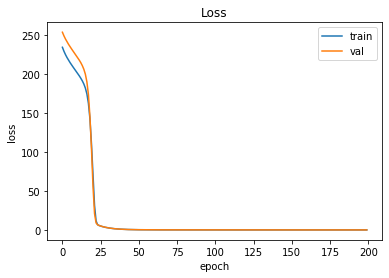

In [8]:
plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

In [9]:
yA_weights = model.get_layer('yA').get_weights()
yB_weights = model.get_layer('yB').get_weights()

print('yA_weights\n', yA_weights, '\n')
print('yB_weights\n', yB_weights)

yA_weights
 [array([[2.0000052]], dtype=float32), array([1.0000343], dtype=float32)] 

yB_weights
 [array([[1.9999226],
       [3.0000017]], dtype=float32), array([1.0000197], dtype=float32)]
